In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import impute
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

#### Load Data

In [3]:
df = pd.read_csv("/Users/yourgrandpaprogenynamesmcky/Developer/BIG_DATA_AI/Hw5/HW3_movie_metadata-661316-17373502460835.csv")

In [4]:
df.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


#### Explore Data

In [5]:
df.shape

(5043, 27)

In [6]:
df.describe().T.round(1)

,count,mean,std,min,25%,50%,75%,max
num_critic_for_reviews,4993.0,140.2,121.6,1.0,50.0,110.0,195.0,8.130000e+02
duration,5028.0,107.2,25.2,7.0,93.0,103.0,118.0,5.110000e+02
director_facebook_likes,4939.0,686.5,2813.3,0.0,7.0,49.0,194.5,2.300000e+04
actor_3_facebook_likes,5020.0,645.0,1665.0,0.0,133.0,371.5,636.0,2.300000e+04
actor_1_facebook_likes,5036.0,6560.0,15020.8,0.0,614.0,988.0,11000.0,6.400000e+05
gross,4159.0,48468407.5,68452990.4,162.0,5340987.5,25517500.0,62309437.5,7.605058e+08
num_voted_users,5043.0,83668.2,138485.3,5.0,8593.5,34359.0,96309.0,1.689764e+06
cast_total_facebook_likes,5043.0,9699.1,18163.8,0.0,1411.0,3090.0,13756.5,6.567300e+05
facenumber_in_poster,5030.0,1.4,2.0,0.0,0.0,1.0,2.0,4.300000e+01
num_user_for_reviews,5022.0,272.8,378.0,1.0,65.0,156.0,326.0,5.060000e+03


In [7]:
numerical_cols = df._get_numeric_data().columns.tolist()

In [8]:
numerical_cols

['num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_1_facebook_likes',
 'gross',
 'num_voted_users',
 'cast_total_facebook_likes',
 'facenumber_in_poster',
 'num_user_for_reviews',
 'budget',
 'title_year',
 'actor_2_facebook_likes',
 'imdb_score',
 'aspect_ratio',
 'movie_facebook_likes']

In [9]:
numerical_features=list(set(numerical_cols)-set(['imdb_score']))
numerical_features

['num_critic_for_reviews',
 'cast_total_facebook_likes',
 'num_user_for_reviews',
 'title_year',
 'num_voted_users',
 'actor_1_facebook_likes',
 'aspect_ratio',
 'budget',
 'facenumber_in_poster',
 'actor_2_facebook_likes',
 'duration',
 'director_facebook_likes',
 'gross',
 'movie_facebook_likes',
 'actor_3_facebook_likes']

In [10]:
numerical_cols=numerical_features.copy()
numerical_cols.append('imdb_score')

In [11]:
numerical_cols

['num_critic_for_reviews',
 'cast_total_facebook_likes',
 'num_user_for_reviews',
 'title_year',
 'num_voted_users',
 'actor_1_facebook_likes',
 'aspect_ratio',
 'budget',
 'facenumber_in_poster',
 'actor_2_facebook_likes',
 'duration',
 'director_facebook_likes',
 'gross',
 'movie_facebook_likes',
 'actor_3_facebook_likes',
 'imdb_score']

In [12]:
categorical_features=list(set(df.columns.tolist())-set(numerical_cols))
categorical_features

['genres',
 'country',
 'director_name',
 'actor_2_name',
 'language',
 'actor_3_name',
 'actor_1_name',
 'movie_imdb_link',
 'plot_keywords',
 'content_rating',
 'movie_title']

In [13]:
df['country'].value_counts()

country
USA              3807
UK                448
France            154
Canada            126
Germany            97
                 ... 
Slovakia            1
Chile               1
Cambodia            1
Official site       1
Philippines         1
Name: count, Length: 65, dtype: int64

In [14]:
df.describe(exclude=np.number).T

,count,unique,top,freq
director_name,4939,2398,Steven Spielberg,26
actor_2_name,5030,3032,Morgan Freeman,20
genres,5043,914,Drama,236
actor_1_name,5036,2097,Robert De Niro,49
movie_title,5043,4917,Ben-Hur,3
actor_3_name,5020,3521,John Heard,8
plot_keywords,4890,4760,based on novel,4
movie_imdb_link,5043,4919,http://www.imdb.com/title/tt0232500/?ref_=fn_t...,3
language,5029,46,English,4704
country,5038,65,USA,3807


In [15]:
df_nums = df[numerical_cols]

In [16]:
df_nums.head()

,num_critic_for_reviews,cast_total_facebook_likes,num_user_for_reviews,title_year,num_voted_users,actor_1_facebook_likes,aspect_ratio,budget,facenumber_in_poster,actor_2_facebook_likes,duration,director_facebook_likes,gross,movie_facebook_likes,actor_3_facebook_likes,imdb_score
0,723.0,4834,3054.0,2009.0,886204,1000.0,1.78,237000000.0,0.0,936.0,178.0,0.0,760505847.0,33000,855.0,7.9
1,302.0,48350,1238.0,2007.0,471220,40000.0,2.35,300000000.0,0.0,5000.0,169.0,563.0,309404152.0,0,1000.0,7.1
2,602.0,11700,994.0,2015.0,275868,11000.0,2.35,245000000.0,1.0,393.0,148.0,0.0,200074175.0,85000,161.0,6.8
3,813.0,106759,2701.0,2012.0,1144337,27000.0,2.35,250000000.0,0.0,23000.0,164.0,22000.0,448130642.0,164000,23000.0,8.5
4,NaN,143,NaN,NaN,8,131.0,NaN,NaN,0.0,12.0,NaN,131.0,NaN,0,NaN,7.1


In [17]:
df_nums.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   num_critic_for_reviews     4993 non-null   float64
 1   cast_total_facebook_likes  5043 non-null   int64  
 2   num_user_for_reviews       5022 non-null   float64
 3   title_year                 4935 non-null   float64
 4   num_voted_users            5043 non-null   int64  
 5   actor_1_facebook_likes     5036 non-null   float64
 6   aspect_ratio               4714 non-null   float64
 7   budget                     4551 non-null   float64
 8   facenumber_in_poster       5030 non-null   float64
 9   actor_2_facebook_likes     5030 non-null   float64
 10  duration                   5028 non-null   float64
 11  director_facebook_likes    4939 non-null   float64
 12  gross                      4159 non-null   float64
 13  movie_facebook_likes       5043 non-null   int64

In [18]:
#Check missing values
(df_nums.isnull().sum()*100/len(df_nums)).sort_values(ascending=False)

gross                        17.529248
budget                        9.756098
aspect_ratio                  6.523895
title_year                    2.141582
director_facebook_likes       2.062265
num_critic_for_reviews        0.991473
actor_3_facebook_likes        0.456078
num_user_for_reviews          0.416419
duration                      0.297442
facenumber_in_poster          0.257783
actor_2_facebook_likes        0.257783
actor_1_facebook_likes        0.138806
cast_total_facebook_likes     0.000000
num_voted_users               0.000000
movie_facebook_likes          0.000000
imdb_score                    0.000000
dtype: float64

In [19]:
df_nums.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
num_critic_for_reviews,4993.0,140.19,1.216000e+02,1.00,50.00,110.00,195.00,8.130000e+02
cast_total_facebook_likes,5043.0,9699.06,1.816380e+04,0.00,1411.00,3090.00,13756.50,6.567300e+05
num_user_for_reviews,5022.0,272.77,3.779800e+02,1.00,65.00,156.00,326.00,5.060000e+03
title_year,4935.0,2002.47,1.247000e+01,1916.00,1999.00,2005.00,2011.00,2.016000e+03
num_voted_users,5043.0,83668.16,1.384853e+05,5.00,8593.50,34359.00,96309.00,1.689764e+06
actor_1_facebook_likes,5036.0,6560.05,1.502076e+04,0.00,614.00,988.00,11000.00,6.400000e+05
aspect_ratio,4714.0,2.22,1.390000e+00,1.18,1.85,2.35,2.35,1.600000e+01
budget,4551.0,39752620.44,2.061149e+08,218.00,6000000.00,20000000.00,45000000.00,1.221550e+10
facenumber_in_poster,5030.0,1.37,2.010000e+00,0.00,0.00,1.00,2.00,4.300000e+01
actor_2_facebook_likes,5030.0,1651.75,4.042440e+03,0.00,281.00,595.00,918.00,1.370000e+05


array([[<Axes: title={'center': 'num_critic_for_reviews'}>,
        <Axes: title={'center': 'cast_total_facebook_likes'}>,
        <Axes: title={'center': 'num_user_for_reviews'}>,
        <Axes: title={'center': 'title_year'}>],
       [<Axes: title={'center': 'num_voted_users'}>,
        <Axes: title={'center': 'actor_1_facebook_likes'}>,
        <Axes: title={'center': 'aspect_ratio'}>,
        <Axes: title={'center': 'budget'}>],
       [<Axes: title={'center': 'facenumber_in_poster'}>,
        <Axes: title={'center': 'actor_2_facebook_likes'}>,
        <Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'director_facebook_likes'}>],
       [<Axes: title={'center': 'gross'}>,
        <Axes: title={'center': 'movie_facebook_likes'}>,
        <Axes: title={'center': 'actor_3_facebook_likes'}>,
        <Axes: title={'center': 'imdb_score'}>]], dtype=object)

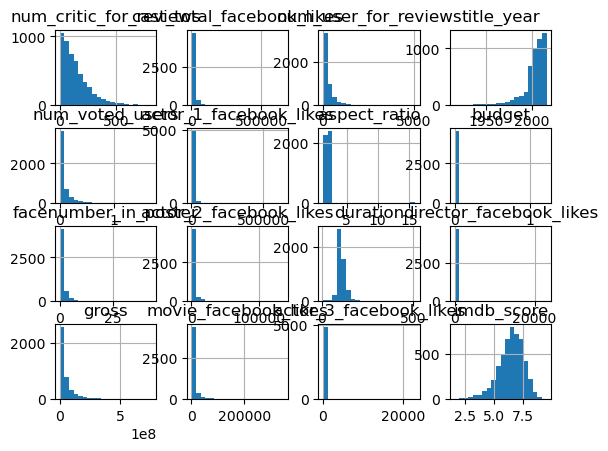

In [20]:
df_nums.hist(bins=20)

In [21]:
#The variables with skewness > 1 such as wheelbase, compressionratio, horsepower, price are highly positively skewed.
#The variables with skewness < -1 are highly negatively skewed.
#The variables with 0.5 < skewness < 1 such as carwidth, curbweight, citympg are moderately positively skewed.
# The variables with -0.5 < skewness < -1 such as stroke are moderately negatively skewed.
# And, the variables with -0.5 < skewness < 0.5 are symmetric i.e normally distributed such as symboling, carheight, boreration, peakrpm, highwaympg.
df_nums.skew().sort_values()

title_year                   -2.292273
imdb_score                   -0.741471
num_critic_for_reviews        1.516533
duration                      2.339134
gross                         3.127204
num_voted_users               4.029871
num_user_for_reviews          4.121475
facenumber_in_poster          4.384766
movie_facebook_likes          5.058927
director_facebook_likes       5.229701
actor_3_facebook_likes        7.279021
aspect_ratio                  9.390056
actor_2_facebook_likes        9.884733
cast_total_facebook_likes    12.831928
actor_1_facebook_likes       19.121776
budget                       48.157435
dtype: float64

#### Preprocess Data

In [22]:
df_nums.isna().sum()

num_critic_for_reviews        50
cast_total_facebook_likes      0
num_user_for_reviews          21
title_year                   108
num_voted_users                0
actor_1_facebook_likes         7
aspect_ratio                 329
budget                       492
facenumber_in_poster          13
actor_2_facebook_likes        13
duration                      15
director_facebook_likes      104
gross                        884
movie_facebook_likes           0
actor_3_facebook_likes        23
imdb_score                     0
dtype: int64

In [23]:
df_nums.shape

(5043, 16)

In [24]:
df_nums['imdb_score'].quantile(q=[0.4,0.5,0.6])

0.4    6.3
0.5    6.6
0.6    6.8
Name: imdb_score, dtype: float64

In [25]:
df_nums['imdb_cut']=df_nums['imdb_score'].apply(lambda x:0 if x<=6.3 else(1 if x>=6.8 else 'middle'))

In [26]:
df_nums['imdb_cut'].value_counts()

imdb_cut
1         2133
0         2115
middle     795
Name: count, dtype: int64

In [27]:
795/len(df)

0.15764425936942297

In [28]:
df_nums_1=df_nums.drop(df_nums[df_nums['imdb_cut']=='middle'].index)
df_nums_1['imdb_cut'].value_counts()

imdb_cut
1    2133
0    2115
Name: count, dtype: int64

In [29]:
df_nums_1.head()

,num_critic_for_reviews,cast_total_facebook_likes,num_user_for_reviews,title_year,num_voted_users,actor_1_facebook_likes,aspect_ratio,budget,facenumber_in_poster,actor_2_facebook_likes,duration,director_facebook_likes,gross,movie_facebook_likes,actor_3_facebook_likes,imdb_score,imdb_cut
0,723.0,4834,3054.0,2009.0,886204,1000.0,1.78,237000000.0,0.0,936.0,178.0,0.0,760505847.0,33000,855.0,7.9,1
1,302.0,48350,1238.0,2007.0,471220,40000.0,2.35,300000000.0,0.0,5000.0,169.0,563.0,309404152.0,0,1000.0,7.1,1
2,602.0,11700,994.0,2015.0,275868,11000.0,2.35,245000000.0,1.0,393.0,148.0,0.0,200074175.0,85000,161.0,6.8,1
3,813.0,106759,2701.0,2012.0,1144337,27000.0,2.35,250000000.0,0.0,23000.0,164.0,22000.0,448130642.0,164000,23000.0,8.5,1
4,NaN,143,NaN,NaN,8,131.0,NaN,NaN,0.0,12.0,NaN,131.0,NaN,0,NaN,7.1,1


In [30]:
df_nums_1.columns

Index(['num_critic_for_reviews', 'cast_total_facebook_likes',
       'num_user_for_reviews', 'title_year', 'num_voted_users',
       'actor_1_facebook_likes', 'aspect_ratio', 'budget',
       'facenumber_in_poster', 'actor_2_facebook_likes', 'duration',
       'director_facebook_likes', 'gross', 'movie_facebook_likes',
       'actor_3_facebook_likes', 'imdb_score', 'imdb_cut'],
      dtype='object')

In [31]:
#1d array (m,1).ravel() or (m,)
#pd.Series index
#pd.DataFrame with single column index and column label
x=df_nums_1.drop(['imdb_score','imdb_cut'],axis=1)
y=df_nums_1['imdb_cut'].to_numpy()

In [32]:
df_nums_1['imdb_cut'].to_numpy().shape

(4248,)

In [33]:
y.shape

(4248,)

In [34]:
y_labels=['imdb_low','imdb_high']

In [35]:
df_nums_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4248 entries, 0 to 5041
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   num_critic_for_reviews     4200 non-null   float64
 1   cast_total_facebook_likes  4248 non-null   int64  
 2   num_user_for_reviews       4228 non-null   float64
 3   title_year                 4148 non-null   float64
 4   num_voted_users            4248 non-null   int64  
 5   actor_1_facebook_likes     4242 non-null   float64
 6   aspect_ratio               3960 non-null   float64
 7   budget                     3817 non-null   float64
 8   facenumber_in_poster       4235 non-null   float64
 9   actor_2_facebook_likes     4236 non-null   float64
 10  duration                   4235 non-null   float64
 11  director_facebook_likes    4152 non-null   float64
 12  gross                      3454 non-null   float64
 13  movie_facebook_likes       4248 non-null   int64  
 1

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,shuffle=True,stratify=y,random_state=100)
y_train=y_train.astype(int)
y_test=y_test.astype(int)

In [37]:
x_train.sort_index().head()

,num_critic_for_reviews,cast_total_facebook_likes,num_user_for_reviews,title_year,num_voted_users,actor_1_facebook_likes,aspect_ratio,budget,facenumber_in_poster,actor_2_facebook_likes,duration,director_facebook_likes,gross,movie_facebook_likes,actor_3_facebook_likes
0,723.0,4834,3054.0,2009.0,886204,1000.0,1.78,237000000.0,0.0,936.0,178.0,0.0,760505847.0,33000,855.0
2,602.0,11700,994.0,2015.0,275868,11000.0,2.35,245000000.0,1.0,393.0,148.0,0.0,200074175.0,85000,161.0
3,813.0,106759,2701.0,2012.0,1144337,27000.0,2.35,250000000.0,0.0,23000.0,164.0,22000.0,448130642.0,164000,23000.0
4,NaN,143,NaN,NaN,8,131.0,NaN,NaN,0.0,12.0,NaN,131.0,NaN,0,NaN
7,324.0,2036,387.0,2010.0,294810,799.0,1.85,260000000.0,1.0,553.0,100.0,15.0,200807262.0,29000,284.0


In [38]:
x_train.shape

(2973, 15)

In [39]:
x_train.describe()

,num_critic_for_reviews,cast_total_facebook_likes,num_user_for_reviews,title_year,num_voted_users,actor_1_facebook_likes,aspect_ratio,budget,facenumber_in_poster,actor_2_facebook_likes,duration,director_facebook_likes,gross,movie_facebook_likes,actor_3_facebook_likes
count,2940.000000,2973.000000,2959.000000,2903.000000,2.973000e+03,2969.000000,2762.000000,2.653000e+03,2963.000000,2965.000000,2964.000000,2907.000000,2.423000e+03,2973.000000,2959.000000
mean,139.463605,9596.612176,278.655965,2002.216672,8.544587e+04,6494.261704,2.226738,4.090344e+07,1.331421,1603.025632,106.969973,680.023048,4.814273e+07,7446.565758,650.682663
std,123.376048,20525.599505,392.936679,12.722760,1.474329e+05,17487.530710,1.425877,2.543049e+08,1.966854,4245.150715,26.048323,2804.035254,7.048790e+07,20061.581475,1750.564118
min,1.000000,0.000000,1.000000,1916.000000,5.000000e+00,0.000000,1.200000,2.180000e+02,0.000000,0.000000,7.000000,0.000000,1.620000e+02,0.000000,0.000000
25%,49.000000,1379.000000,64.000000,1999.000000,8.217000e+03,606.000000,1.850000,5.500000e+06,0.000000,282.000000,93.000000,6.000000,5.705630e+06,0.000000,132.000000
50%,108.000000,3016.000000,159.000000,2005.000000,3.239900e+04,975.000000,2.350000,1.800000e+07,1.000000,592.000000,103.000000,44.000000,2.439747e+07,158.000000,368.000000
75%,192.000000,13071.000000,329.000000,2011.000000,9.246100e+04,11000.000000,2.350000,4.000000e+07,2.000000,898.000000,117.000000,192.000000,5.971586e+07,2000.000000,627.500000
max,813.000000,656730.000000,5060.000000,2016.000000,1.689764e+06,640000.000000,16.000000,1.221550e+10,31.000000,137000.000000,511.000000,22000.000000,7.605058e+08,349000.000000,23000.000000


##### Change distribution to be normalized

In [40]:
powertran=preprocessing.PowerTransformer()
powertran=powertran.fit(x_train)
x_train=pd.DataFrame(powertran.transform(x_train),columns=x_train.columns)
x_train.head()

,num_critic_for_reviews,cast_total_facebook_likes,num_user_for_reviews,title_year,num_voted_users,actor_1_facebook_likes,aspect_ratio,budget,facenumber_in_poster,actor_2_facebook_likes,duration,director_facebook_likes,gross,movie_facebook_likes,actor_3_facebook_likes
0,-0.548083,-0.327672,-0.993857,0.453136,-0.509705,-0.481017,-0.639743,-0.064374,-1.048678,-0.306605,0.373111,0.645701,-1.671120,0.607972,0.076214
1,0.121030,0.126709,-0.404985,0.234625,0.221228,-0.290918,-0.896681,-1.475926,0.899262,0.288557,-0.731938,-0.184101,-1.775062,1.183027,0.743956
2,0.344038,-0.068187,1.210289,-0.456064,1.197378,-0.296795,-0.639743,-0.316328,-1.048678,0.367064,-0.688175,0.991276,-0.357613,1.256336,0.730093
3,1.859988,1.088979,0.474722,1.045084,0.979463,1.325590,-0.639743,0.405867,-1.048678,0.154100,0.020964,-1.520837,0.250806,1.370346,-0.039819
4,0.215766,-0.295339,0.004082,0.800181,0.245750,-0.307640,-0.639743,0.517688,1.434581,0.281349,0.257330,0.093067,0.375621,1.215854,-0.263727


In [41]:
powertran.lambdas_

array([ 3.06795168e-01,  1.35500025e-01,  1.49480248e-01,  4.68507943e+01,
        1.54335941e-01,  4.91365438e-02, -2.14586317e+00,  1.59219753e-01,
       -6.33919025e-01,  8.59455455e-02,  4.89664131e-01, -2.36082527e-02,
        2.26026592e-01, -4.20929269e-02,  1.55867455e-01])

array([[<Axes: title={'center': 'num_critic_for_reviews'}>,
        <Axes: title={'center': 'cast_total_facebook_likes'}>,
        <Axes: title={'center': 'num_user_for_reviews'}>,
        <Axes: title={'center': 'title_year'}>],
       [<Axes: title={'center': 'num_voted_users'}>,
        <Axes: title={'center': 'actor_1_facebook_likes'}>,
        <Axes: title={'center': 'aspect_ratio'}>,
        <Axes: title={'center': 'budget'}>],
       [<Axes: title={'center': 'facenumber_in_poster'}>,
        <Axes: title={'center': 'actor_2_facebook_likes'}>,
        <Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'director_facebook_likes'}>],
       [<Axes: title={'center': 'gross'}>,
        <Axes: title={'center': 'movie_facebook_likes'}>,
        <Axes: title={'center': 'actor_3_facebook_likes'}>, <Axes: >]],
      dtype=object)

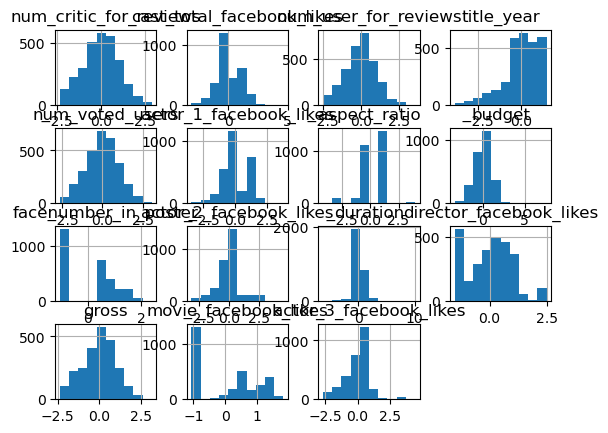

In [42]:
x_train.hist()


In [43]:
x_test=pd.DataFrame(powertran.transform(x_test),columns=x_test.columns)

##### fill missing values

In [44]:
imputer=impute.SimpleImputer(missing_values=np.nan,strategy='median')
imputer.fit(x_train)
x_train=pd.DataFrame(imputer.transform(x_train),columns=x_train.columns)
x_test=pd.DataFrame(imputer.transform(x_test),columns=x_train.columns)

##### scale features: not necessary as you did powertransformer already

In [45]:
scaler=preprocessing.StandardScaler()
scaler.fit(x_train)
x_train=pd.DataFrame(scaler.transform(x_train),columns=x_train.columns)
x_test=pd.DataFrame(scaler.transform(x_test),columns=x_train.columns)

##### select feature

In [47]:
n=len(x_train.columns)
n

15

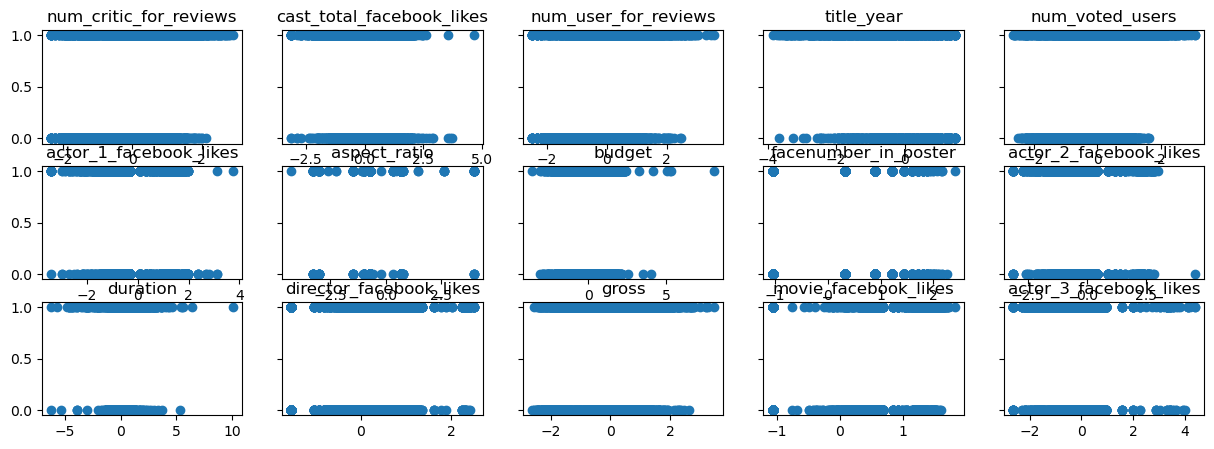

In [48]:
fig,ax=plt.subplots(3,5,figsize=(15,5),sharey=True)
for i in np.arange(0,n):
    col=x_train.columns[i]
    ax[divmod(i,5)[0],divmod(i,5)[1]].scatter(x_train[col],y_train)
    ax[divmod(i,5)[0],divmod(i,5)[1]].set_title(col)
plt.show()

In [49]:
x_train.corr().mask(x_train.corr().abs()<0.8,'')

,num_critic_for_reviews,cast_total_facebook_likes,num_user_for_reviews,title_year,num_voted_users,actor_1_facebook_likes,aspect_ratio,budget,facenumber_in_poster,actor_2_facebook_likes,duration,director_facebook_likes,gross,movie_facebook_likes,actor_3_facebook_likes
num_critic_for_reviews,1.0,,,,0.800632,,,,,,,,,,
cast_total_facebook_likes,,1.0,,,,0.96761,,,,0.832134,,,,,
num_user_for_reviews,,,1.0,,0.896937,,,,,,,,,,
title_year,,,,1.0,,,,,,,,,,,
num_voted_users,0.800632,,0.896937,,1.0,,,,,,,,,,
actor_1_facebook_likes,,0.96761,,,,1.0,,,,,,,,,
aspect_ratio,,,,,,,1.0,,,,,,,,
budget,,,,,,,,1.0,,,,,,,
facenumber_in_poster,,,,,,,,,1.0,,,,,,
actor_2_facebook_likes,,0.832134,,,,,,,,1.0,,,,,0.830951


<Axes: >

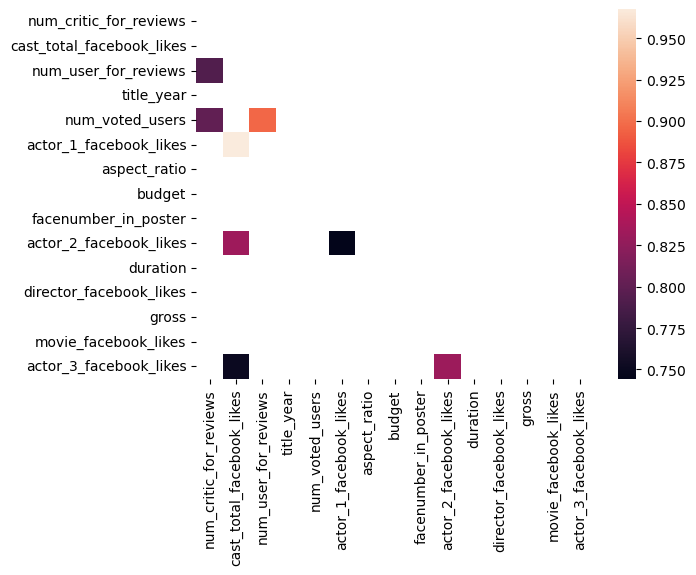

In [50]:
sns.heatmap(x_train.corr(),annot=True,fmt='.1f',mask = np.triu(np.ones_like(x_train.corr(), dtype=bool))|(abs(x_train.corr())<0.7))

In [51]:
# VIF starts at 1 and has no upper limit
# VIF = 1, no correlation between the independent variable and the other variables
# VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others
vif=pd.DataFrame()
vif['features']=x_train.columns
vif['vif']=[variance_inflation_factor(x_train.values,i) for i in range(x_train.shape[1])]
vif.sort_values(by=['vif'])

,features,vif
8,facenumber_in_poster,1.067956
11,director_facebook_likes,1.082957
13,movie_facebook_likes,1.088280
6,aspect_ratio,1.180205
10,duration,1.228234
7,budget,1.625332
12,gross,1.634747
3,title_year,1.670189
14,actor_3_facebook_likes,4.008806
0,num_critic_for_reviews,4.184276


In [53]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier

selector = SelectKBest(score_func=f_classif, k=10)
x_train_selected = selector.fit_transform(x_train, y_train)
x_test_selected = selector.transform(x_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_selected, y_train)

selected_features = selector.get_support(indices=True)
print(selected_features)


[ 0  2  3  4  8 10 11 12 13 14]


In [54]:
for i in selector.get_support(indices=True).tolist():
    print(x_train.columns[i])

num_critic_for_reviews
num_user_for_reviews
title_year
num_voted_users
facenumber_in_poster
duration
director_facebook_likes
gross
movie_facebook_likes
actor_3_facebook_likes


In [55]:
selected_features_1=x_train.columns[selector.get_support(indices=True)].tolist()
selected_features_1

['num_critic_for_reviews',
 'num_user_for_reviews',
 'title_year',
 'num_voted_users',
 'facenumber_in_poster',
 'duration',
 'director_facebook_likes',
 'gross',
 'movie_facebook_likes',
 'actor_3_facebook_likes']

In [57]:
selected_features=list(set(x_train.columns)-set(['actor_1_facebook_likes','actor_2_facebook_likes','actor_3_facebook_likes','num_critic_for_reviews','num_user_for_reviews']))

In [58]:
x_train[selected_features].corr().mask(x_train[selected_features].corr().abs()<0.7,'')

,cast_total_facebook_likes,facenumber_in_poster,title_year,num_voted_users,duration,director_facebook_likes,gross,aspect_ratio,budget,movie_facebook_likes
cast_total_facebook_likes,1.0,,,,,,,,,
facenumber_in_poster,,1.0,,,,,,,,
title_year,,,1.0,,,,,,,
num_voted_users,,,,1.0,,,,,,
duration,,,,,1.0,,,,,
director_facebook_likes,,,,,,1.0,,,,
gross,,,,,,,1.0,,,
aspect_ratio,,,,,,,,1.0,,
budget,,,,,,,,,1.0,
movie_facebook_likes,,,,,,,,,,1.0


In [59]:
vif_after=pd.DataFrame()
vif_after['features']=x_train[selected_features].columns
vif_after['vif']=[variance_inflation_factor(x_train[selected_features].values,i) for i in range(x_train[selected_features].shape[1])]
vif_after.sort_values(by=['vif'])

,features,vif
1,facenumber_in_poster,1.034982
9,movie_facebook_likes,1.071237
5,director_facebook_likes,1.079528
7,aspect_ratio,1.171700
4,duration,1.209956
2,title_year,1.271373
0,cast_total_facebook_likes,1.427196
6,gross,1.576121
8,budget,1.615244
3,num_voted_users,1.971153


#### Model

##### train

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train[selected_features],y_train)

KNeighborsClassifier()

In [63]:
y_train_pred=pd.DataFrame(knn.predict(x_train[selected_features]))

Classification Report: 
               precision    recall  f1-score   support

    imdb_low       0.81      0.89      0.85      1480
   imdb_high       0.88      0.79      0.83      1493

    accuracy                           0.84      2973
   macro avg       0.84      0.84      0.84      2973
weighted avg       0.84      0.84      0.84      2973

Accuracy on train:   0.8382105617221661 



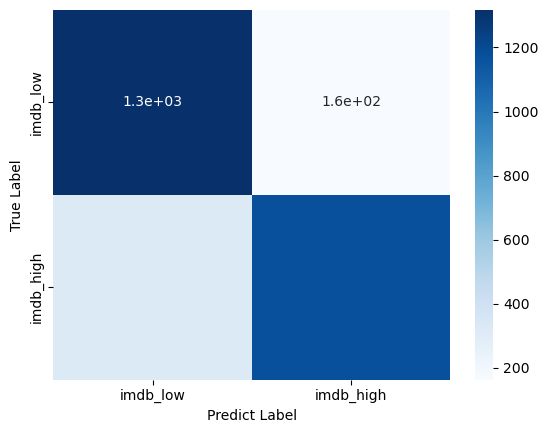

In [65]:
print("Classification Report: \n", metrics.classification_report(y_train, y_train_pred,target_names=y_labels))
print("Accuracy on train:  ",knn.score(x_train[selected_features],y_train),'\n')
cf=metrics.confusion_matrix(y_train,y_train_pred)
sns.heatmap(cf,annot=True,cmap='Blues',yticklabels=y_labels,xticklabels=y_labels)
plt.ylabel("True Label")
plt.xlabel("Predict Label")
plt.show()


##### test

In [67]:
y_test_pred=pd.DataFrame(knn.predict(x_test[selected_features]))

#### Validation

Classification Report: 
               precision    recall  f1-score   support

    imdb_low       0.74      0.82      0.78       635
   imdb_high       0.80      0.72      0.76       640

    accuracy                           0.77      1275
   macro avg       0.77      0.77      0.77      1275
weighted avg       0.77      0.77      0.77      1275

Accuracy on train:   0.7686274509803922 



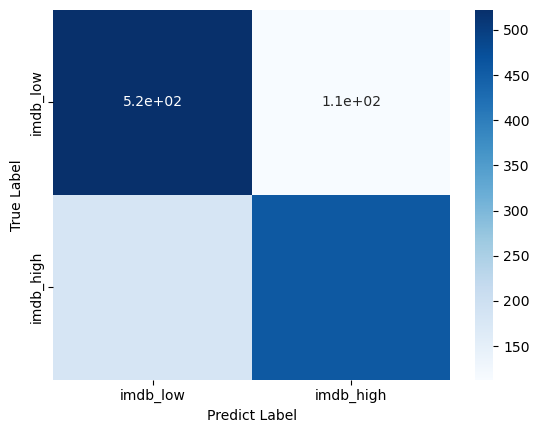

In [68]:
print("Classification Report: \n", metrics.classification_report(y_test, y_test_pred,target_names=y_labels))
print("Accuracy on train:  ",knn.score(x_test[selected_features],y_test),'\n')
cf=metrics.confusion_matrix(y_test,y_test_pred)
sns.heatmap(cf,annot=True,cmap='Blues',yticklabels=y_labels,xticklabels=y_labels)
plt.ylabel("True Label")
plt.xlabel("Predict Label")
plt.show()


In [72]:
selector = SelectKBest(score_func=f_classif, k=10)  
x_train_selected = selector.fit_transform(x_train, y_train)
x_test_selected = selector.transform(x_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_selected, y_train)

result = pd.DataFrame()
result["feature"] = x_train.columns[selector.get_support()]
result["score"] = selector.scores_[selector.get_support()]
result = result.sort_values(by="score", ascending=False)

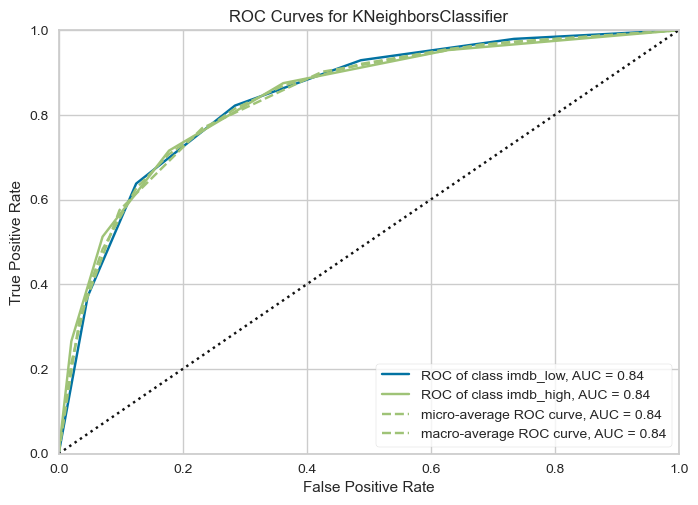

<Axes: title={'center': 'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [76]:
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(KNeighborsClassifier(n_neighbors=5), classes=y_labels)
visualizer.fit(x_train[selected_features], y_train)        # Fit the training data to the visualizer
visualizer.score(x_test[selected_features], y_test)        # Evaluate the model on the test data
visualizer.show()

#### All features Model

Classification Report: 
               precision    recall  f1-score   support

    imdb_low       0.74      0.82      0.78       635
   imdb_high       0.80      0.72      0.76       640

    accuracy                           0.77      1275
   macro avg       0.77      0.77      0.77      1275
weighted avg       0.77      0.77      0.77      1275



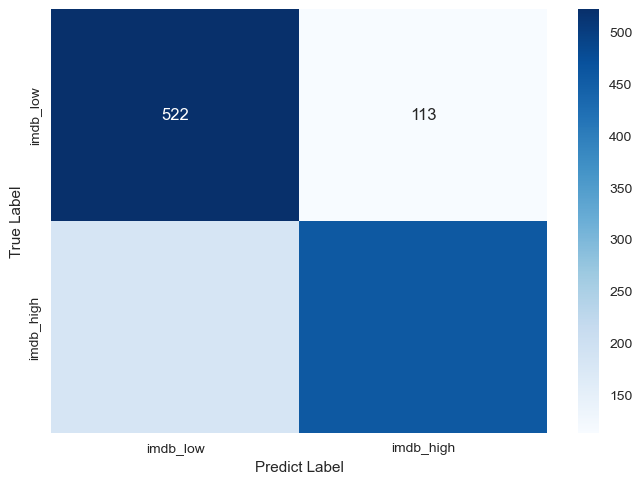

In [78]:
knn_all=KNeighborsClassifier(n_neighbors=5)
knn_all.fit(x_train,y_train)
y_test_pred_all=pd.DataFrame(knn_all.predict(x_test))
print("Classification Report: \n", metrics.classification_report(y_test, y_test_pred,target_names=y_labels))
cf=metrics.confusion_matrix(y_test,y_test_pred)
sns.heatmap(cf,annot=True,cmap='Blues',fmt='.0f',yticklabels=y_labels,xticklabels=y_labels)
plt.ylabel("True Label")
plt.xlabel("Predict Label")
plt.show()

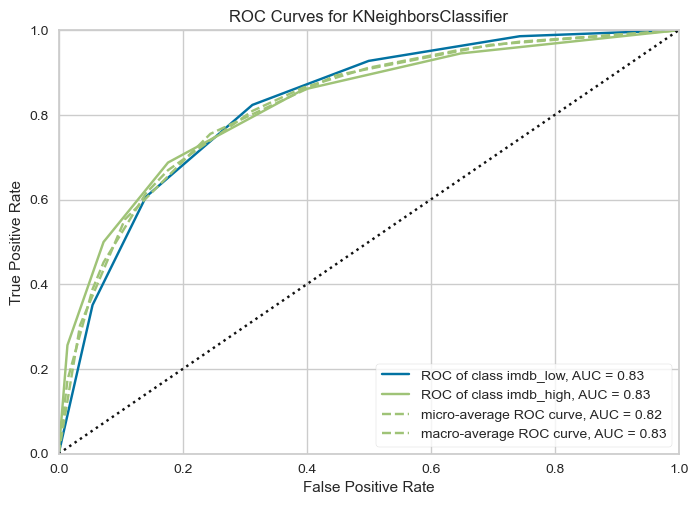

<Axes: title={'center': 'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [80]:
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(KNeighborsClassifier(n_neighbors=5), classes=y_labels)
visualizer.fit(x_train, y_train)        # Fit the training data to the visualizer
visualizer.score(x_test, y_test)        # Evaluate the model on the test data
visualizer.show()

In [83]:
knn_all = KNeighborsClassifier(n_neighbors=5)
knn_all.fit(x_train_selected, y_train)

result_all = pd.DataFrame()
result_all["features"] = x_train.columns[selector.get_support()]
result_all["score"] = selector.scores_[selector.get_support()]
result_all = result_all.sort_values(by="score", ascending=False)

print(result_all)

                  features       score
3          num_voted_users  396.422162
1     num_user_for_reviews  278.345476
0   num_critic_for_reviews  220.705456
5                 duration  134.210318
2               title_year  105.320022
6  director_facebook_likes   24.489999
4     facenumber_in_poster   18.903792
9   actor_3_facebook_likes   15.570723
7                    gross   13.897432
8     movie_facebook_likes   13.439246
